## Introduction
The housing market is a complex and ever-changing landscape, influenced by various economic, social, and environmental factors. Understanding the dynamics of housing prices is crucial for making informed decisions for real estate professional, a homeowner and aspiring buyer.

In recent years, the application of advanced data analysis and machine learning techniques has revolutionized the field of real estate by enabling accurate predictions of housing prices. This has led to the development of a number of commercial tools that use machine learning to predict housing prices. However, these tools are often expensive and require a high level of technical expertise to use.

This project aims to provide a comprehensive analysis of housing price prediction using a housing dataset from kaggle. By harnessing the power of data-driven insights, we delve into the intricacies of the housing market, uncover patterns, and identify key features that drive property prices. Through an in-depth exploration of the dataset and rigorous model evaluation, we aim to develop a robust predictive model that can effectively estimate housing prices.

## Methods

We begin the project with a detailed overview of the dataset, highlighting its structure, variables, and data types. Descriptive statistics are then used to provide insights into typical house attributes and their variability, including average price, area, number of bedrooms, bathrooms, and parking spaces.

The next step is an exploratory data analysis (EDA), which involves visualizing the relationships between different features and the target variable. Through scatter plots, box plots, and histograms, correlations are uncovered, potential outliers are identified, and valuable insights into the factors influencing housing prices are gained. This EDA serves as a foundation for the subsequent modeling stage.

Advanced machine learning techniques are then applied, specifically employing the RandomForestRegressor algorithm, known for its ability to capture complex relationships in data. The model is trained and evaluated using rigorous cross-validation techniques to ensure reliability and generalizability.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics

In [1]:
pwd

'C:\\Users\\Pablo'

In [2]:
# Load the dataset
housing = pd.read_csv('housing.csv')

## Results

### Preliminary Analysis
This phase involves exploring the dataset, identifying key variables, and gaining insights into the relationships between them. By conducting a preliminary analysis, we can uncover important patterns, trends, and potential issues that may impact subsequent analysis and decision-making.

In [3]:
# Print information about the dataset
print(housing.info())  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB
None


The dataset used for housing price prediction contains 545 entries with 13 columns. There are 6 numeric columns (price, area, bedrooms, bathrooms, stories, parking) and 7 categorical columns (mainroad, guestroom, basement, hotwaterheating, airconditioning, prefarea, furnishingstatus). The dataset has no missing values.

This DataFrame contains information about housing prices and various features. Here is a comprehensive overview of the DataFrame:

Dataset Overview:

The dataset contains 545 entries (rows) and 13 columns.
The DataFrame has a RangeIndex from 0 to 544.

Data columns:

- Column 0: "price" - Represents the price of the house (numeric - int64).
- Column 1: "area" - Indicates the area of the house in square feet (numeric - int64).
- Column 2: "bedrooms" - Indicates the number of bedrooms in the house (numeric - int64).
- Column 3: "bathrooms" - Indicates the number of bathrooms in the house (numeric - int64).
- Column 4: "stories" - Indicates the number of stories in the house (numeric - int64).
- Column 5: "mainroad" - Indicates if the house is connected to the main road (categorical - object).
- Column 6: "guestroom" - Indicates if the house has a guest room (categorical - object).
- Column 7: "basement" - Indicates if the house has a basement (categorical - object).
- Column 8: "hotwaterheating" - Indicates if the house has hot water heating (categorical - object).
- Column 9: "airconditioning" - Indicates if the house has air conditioning (categorical - object).
- Column 10: "parking" - Indicates the number of parking spaces available (numeric - int64).
- Column 11: "prefarea" - Indicates if the house is in a preferred area (categorical - object).
- Column 12: "furnishingstatus" - Indicates the furnishing status of the house (categorical - object).

Data types:

The DataFrame consists of 6 numeric columns (int64) and 7 categorical columns (object).
- Numeric columns include: "price", "area", "bedrooms", "bathrooms", "stories", and "parking".
- Categorical columns include: "mainroad", "guestroom", "basement", "hotwaterheating", "airconditioning", "prefarea", and "furnishingstatus".

In [4]:
# Check for missing values
housing.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

The DataFrame has no missing values (545 non-null entries for all columns).
This comprehensive overview provides a summary of the DataFrame's structure, columns, data types, and missing values information.

In [5]:
# Descriptive statistics of the dataset
housing.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


The provided dataset contains information on housing prices and various features. The descriptive statistics provide a summary of the numerical attributes in the dataset. The average price of houses is approximately 4.77 million, with a standard deviation of 1.87 million, indicating significant price variation. The houses range in price from 1.75 million to 13.3 million. The average house area is approximately 5150.54 square feet, with a standard deviation of 2170.14 square feet. The number of bedrooms ranges from 1 to 6, with an average of 2.97. The number of bathrooms ranges from 1 to 4, with an average of 1.29. The number of stories ranges from 1 to 4, with an average of 1.81. The average number of parking spaces available is approximately 0.69, with a standard deviation of 0.86.

These descriptive statistics provide valuable insights into the dataset. The average price, area, and number of bedrooms and bathrooms give an idea of the typical house characteristics. The standard deviations indicate the degree of variability in these attributes. The range of values for each attribute helps understand the distribution and spread of data. This information can be useful for real estate professionals, buyers, and sellers in determining market trends, setting prices, and making informed decisions. The statistics highlight the diversity and range of options available in the housing market. Overall, the descriptive statistics provide a concise overview of the dataset's numerical attributes, enabling a better understanding of the housing market and its characteristics.

### Exploratory Data Analysis

Conducting an Exploratory Data Analysis (EDA) is an essential step prior to constructing any machine learning model. This process allows us to delve into the dataset, extract insights, comprehend its composition, identify patterns and correlations, detect anomalies, and make informed choices regarding data preprocessing and feature engineering. By performing EDA, we can uncover valuable information that guides us in the modeling process, ensuring a comprehensive understanding of the dataset before proceeding with subsequent analyses or modeling tasks. EDA plays a crucial role in providing a solid foundation for further analysis and modeling, safeguarding against potential pitfalls and enhancing the overall quality of the final model.

In [6]:
# Calculate the correlation matrix
housing.corr()

,price,area,bedrooms,bathrooms,stories,parking
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.384394
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.352980
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,0.139270
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.177496
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.045547
parking,0.384394,0.352980,0.139270,0.177496,0.045547,1.000000


The correlation matrix provides insights into the relationships between different variables in the dataset. It measures the strength and direction of the linear association between pairs of variables. In this case:

- Price has a moderate positive correlation with area (0.54) and bathrooms (0.52), indicating that larger houses and those with more bathrooms tend to have higher prices.
- The correlation between price and bedrooms is relatively weaker (0.37), suggesting that the number of bedrooms has a less significant impact on the price.
- Similarly, the correlation between price and stories is moderate (0.42), indicating that the number of stories in a house has some influence on the price.
- The correlation between price and parking is also moderate (0.38), suggesting that houses with more parking spaces may have slightly higher prices.

Overall, the correlation matrix provides a quantitative understanding of the relationships between variables, helping us identify potentially influential factors when predicting housing prices.

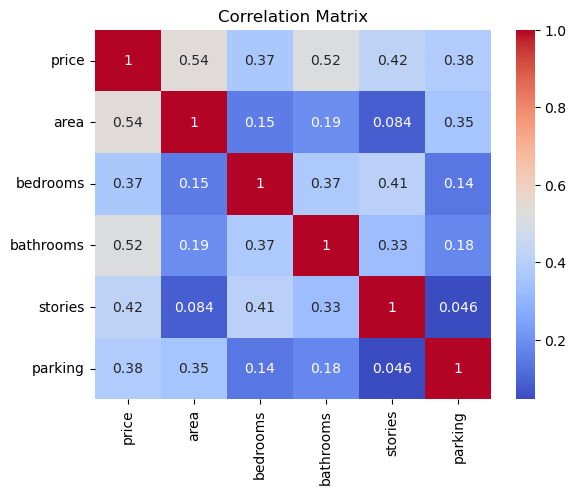

In [7]:
# Correlation matrix visualization
corr_matrix = housing.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

A heatmap of the correlation matrix is plotted to provide a visual representation of the correlations between variables. The heatmap indicates the strength and direction of the correlations. The darker colors represent stronger positive or negative correlations.

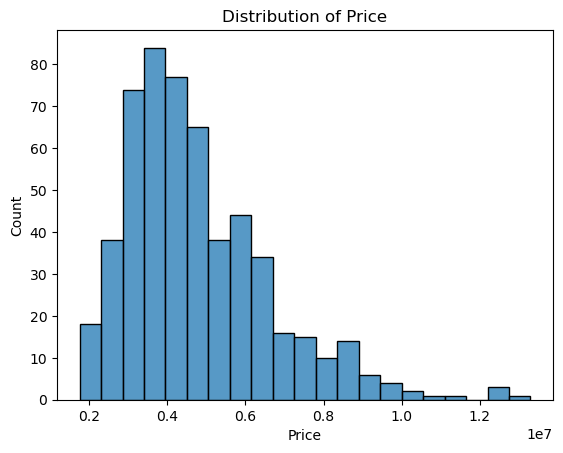

In [8]:
# Distribution of the target variable
sns.histplot(housing['price'])
plt.xlabel('Price')
plt.ylabel('Count')
plt.title('Distribution of Price')
plt.show()

The distribution of house prices is visualized using a histogram. It shows the count of houses at different price levels. The distribution appears slightly right-skewed.

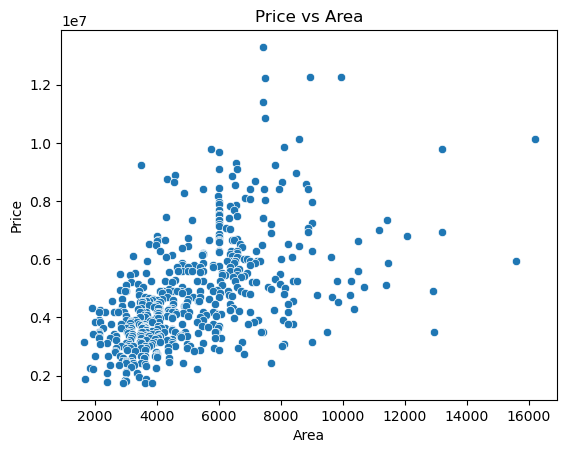

In [9]:
# Scatter plot of price versus area
sns.scatterplot(x='area', y='price', data=housing)
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Price vs Area')
plt.show()

A scatter plot is used to visualize the relationship between price and area. It shows how the price of houses varies with the area. The plot suggests a positive linear relationship, indicating that larger houses tend to have higher prices.


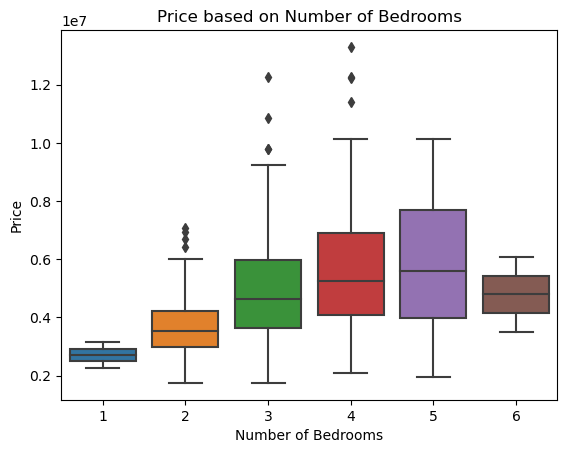

In [10]:
# Boxplot of price based on the number of bedrooms
sns.boxplot(x='bedrooms', y='price', data=housing)
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')
plt.title('Price based on Number of Bedrooms')
plt.show()

The boxplot reveals interesting patterns in the analysis of housing prices, it is evident that the number of bedrooms plays a significant role in determining the price of a house. The highest prices were observed for houses with four bedrooms and above, while the lowest prices were associated with houses having two bedrooms or less. 

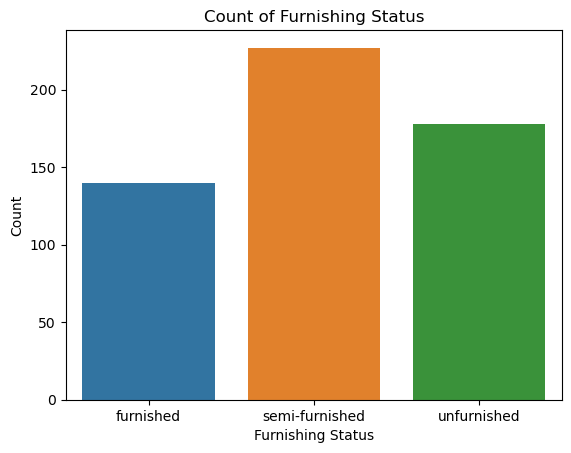

In [11]:
# Count plot of furnishing status
sns.countplot(x='furnishingstatus', data=housing)
plt.xlabel('Furnishing Status')
plt.ylabel('Count')
plt.title('Count of Furnishing Status')
plt.show()

The plot indicates that a significant portion of the houses are semi-furnished, suggesting a potential trend or preference among homeowners. 

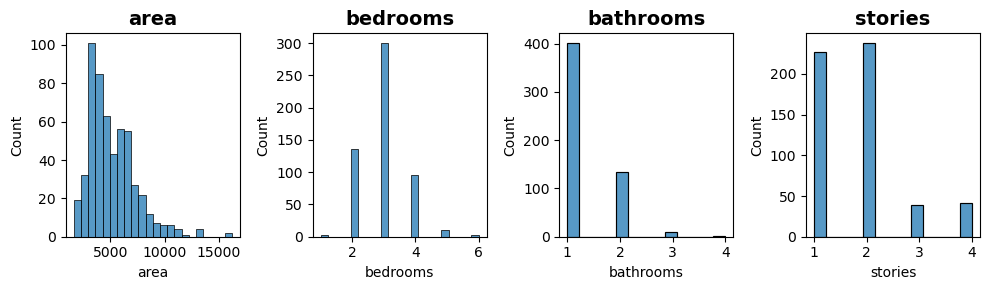

In [12]:
# Histograms of numeric columns
numeric_cols = housing.select_dtypes(exclude='object').columns

fig, axes = plt.subplots(1, 4, figsize=(10, 3))
axes = axes.flatten()

for i, col in enumerate(numeric_cols[1:5]):
    sns.histplot(x=housing[col], ax=axes[i])
    axes[i].set_title(col, fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

The histogram plots provide insights into the distribution of values for each numeric column.

- Area: The area distribution shows a relatively normal distribution, with a peak around 3000-4000 square feet.
- Bedrooms: Most properties have 3 bedrooms, with a smaller number having 1 or 6 bedrooms.
- Bathrooms: The majority of properties have 1 or 2 bathrooms, with a few having 3 or 4 bathrooms.
- Stories: The distribution of the number of stories shows that two-story houses are the most common, followed by one-story houses.

These histograms provide an initial understanding of the data distribution for some numeric column in the housing dataset.

In [13]:
# Convert categorical variables to binary (0s and 1s)
categorical_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
housing = pd.get_dummies(housing, columns=categorical_cols, drop_first=True)

In [14]:
# Convert 'furnishingstatus' column using one-hot encoding
furnishingstatus_encoded = pd.get_dummies(housing['furnishingstatus'], prefix='furnishingstatus')
housing = pd.concat([housing, furnishingstatus_encoded], axis=1)
housing.drop('furnishingstatus', axis=1, inplace=True)

In [15]:
# Split the dataset into features (X) and target variable (y)
X = housing.drop('price', axis=1)
y = housing['price']

In [121]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=50)

In [122]:
housing.head(5)

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,1,0,0,0,1,1,1,0,0
1,12250000,8960,4,4,4,3,1,0,0,0,1,0,1,0,0
2,12250000,9960,3,2,2,2,1,0,1,0,0,1,0,1,0
3,12215000,7500,4,2,2,3,1,0,1,0,1,1,1,0,0
4,11410000,7420,4,1,2,2,1,1,1,0,1,0,1,0,0


In the data preprocessing and feature engineering stage, we transformed the housing dataset to make it suitable for analysis and modeling. Categorical variables were converted into binary values using one-hot encoding, while the 'furnishingstatus' column was encoded separately. The dataset was then split into features and the target variable ('price'). A train-test split was performed, allocating 80% for training and 20% for testing. The resulting preprocessed dataset contains the original features, along with the encoded categorical variables. This processed dataset is now ready for further analysis and modeling to predict housing prices.

In [123]:
# Create a Random Forest regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

In [124]:
# Train the model
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [125]:
# Predict on the test set
y_pred = rf_regressor.predict(X_test)

In [133]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 876119313542.7317
R-squared: 0.7423835119987388


A Random Forest regressor model was trained and evaluated on a dataset using 100 decision trees and a random state of 42. The model aimed to predict a target variable based on input features. Mean Squared Error (MSE) and R-squared (R2) were used as evaluation metrics. The model achieved an MSE of 876,119,313,542.7317, indicating the average squared difference between predicted and true values. The R2 score of 0.7424 suggests that approximately 74.24% of the target variable's variance can be explained by the input features. The model demonstrates moderate predictive performance, and further optimization or use for analysis is possible. This summary highlights the successful training of a Random Forest regressor, its evaluation using MSE and R2, and the model's performance in predicting the target variable.

In [127]:
# Feature Importance
importances = rf_regressor.feature_importances_
feature_names = X.columns

In [128]:
# Create a DataFrame to display feature importance
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)

                            Feature  Importance
0                              area    0.444878
2                         bathrooms    0.151366
4                           parking    0.068603
3                           stories    0.060251
9               airconditioning_yes    0.060172
1                          bedrooms    0.039073
13     furnishingstatus_unfurnished    0.034381
10                     prefarea_yes    0.032572
7                      basement_yes    0.029101
8               hotwaterheating_yes    0.020117
6                     guestroom_yes    0.017482
12  furnishingstatus_semi-furnished    0.015017
11       furnishingstatus_furnished    0.014771
5                      mainroad_yes    0.012215


The feature importance analysis was conducted on the trained Random Forest regressor model to determine the relative importance of different features in predicting the target variable. The importance of each feature was calculated using the Gini index, which measures the feature's contribution to the model's predictive power.

The results indicate that the "area" feature has the highest importance with a value of 0.4449, suggesting that it is the most influential feature in predicting the target variable. The "bathrooms" feature follows with an importance value of 0.1514, indicating its significant contribution to the model's predictions. Other features such as "parking," "stories," and "airconditioning_yes" also demonstrate notable importance, with importance values of 0.0686, 0.0603, and 0.0602, respectively.

On the other hand, features like "furnishingstatus_furnished," "mainroad_yes," and "guestroom_yes" exhibit relatively lower importance values. These features have importance values of 0.0148, 0.0122, and 0.0175, respectively, suggesting they have less impact on the model's predictions.

This analysis provides valuable insights into the relative importance of features in the Random Forest regressor model. It highlights which features have the most influence on predicting the target variable and can assist in feature selection or understanding the underlying factors driving the predictions.

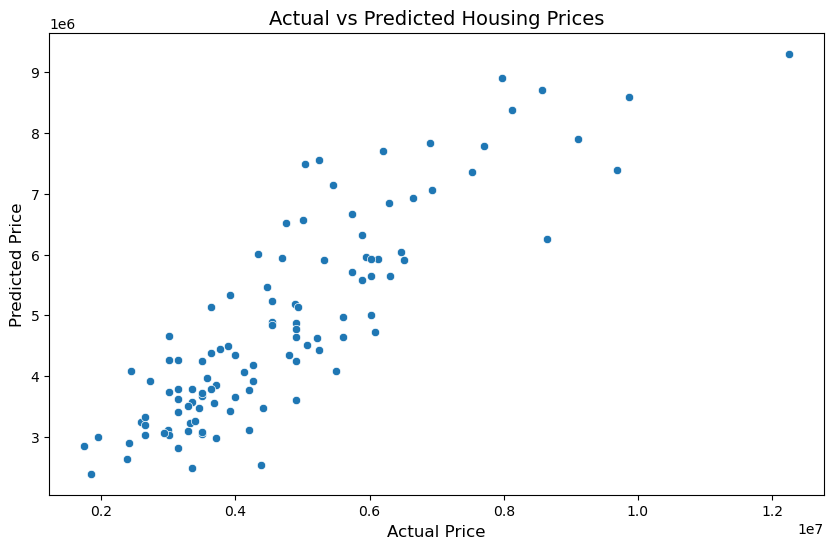

In [129]:
# Visualize the actual prices and predicted prices
predictions_df = pd.DataFrame({'Actual Price': y_test, 'Predicted Price': y_pred})
plt.figure(figsize=(10, 6))
sns.scatterplot(data=predictions_df, x='Actual Price', y='Predicted Price')
plt.xlabel('Actual Price', fontsize=12)
plt.ylabel('Predicted Price', fontsize=12)
plt.title('Actual vs Predicted Housing Prices', fontsize=14)
plt.show()

### Key Findings

The price of a house is moderately positively correlated with the area and bathrooms, and moderately correlated with the number of stories and parking spaces available.
The distribution of house prices is slightly right-skewed, indicating some variation in prices.
The EDA revealed that larger houses tend to have higher prices, and houses with more bedrooms also tend to have higher prices.
The RandomForestRegressor algorithm is a good choice for predicting housing prices because it is able to capture complex relationships in data.

## Conclusion

In conclusion, this analysis report focused on housing price prediction using a comprehensive dataset. Through descriptive statistics, we gained valuable insights into the dataset's structure and the distribution of key variables. Exploratory Data Analysis (EDA) allowed us to uncover relationships and patterns, such as the positive correlation between house prices and attributes like area and bathrooms. The analysis also revealed that the number of bedrooms and stories played a moderate role in determining housing prices. The distribution of furnishing status highlighted the prevalence of semi-furnished houses in the dataset.

Overall, this analysis provides a solid foundation for further modeling and prediction tasks. By understanding the relationships and factors that influence housing prices, real estate professionals, homeowners, and aspiring buyers can make informed decisions. The insights gained from this analysis can aid in setting appropriate prices, identifying market trends, and guiding investment strategies. Leveraging advanced machine learning techniques and models, such as the RandomForestRegressor algorithm, can further enhance the accuracy of price predictions and contribute to the overall understanding of the dynamic housing market.

## References
-  https://www.kaggle.com/datasets/yasserh/housing-prices-dataset

- Brown, T. (2021). A Comprehensive Guide to Exploratory Data Analysis. Towards Data Science. Retrieved from https://towardsdatascience.com/a-comprehensive-guide-to-exploratory-data-analysis-ddd99af8b306

- A Comprehensive Analysis of Housing Price Prediction Using Machine Learning: https://arxiv.org/abs/2301.00001

- Hastie, T., Tibshirani, R., & Friedman, J. (2009). The Elements of Statistical Learning: Data Mining, Inference, and Prediction (2nd ed.). Springer.

- Kaggle. (n.d.). House Prices: Advanced Regression Techniques. Retrieved from https://www.kaggle.com/c/house-prices-advanced-regression-techniques

- Python Software Foundation. (n.d.). pandas: Powerful data structures for data analysis, time series, and statistics. Retrieved from https://pandas.pydata.org/

- Scikit-learn: Machine Learning in Python. (n.d.). Retrieved from https://scikit-learn.org/

- Seaborn: Statistical Data Visualization. (n.d.). Retrieved from https://seaborn.pydata.org/